In [61]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
from prophet import Prophet
import matplotlib.pyplot as plt
from datetime import datetime
import pytz

%matplotlib inline

In [62]:
# Read csv file as DataFrame, with the first column as row index
df_columbus = pd.read_csv("data/columbus.csv"
                )
# Preview the dataset
df_columbus.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,315532800,1980-01-01 00:00:00 +0000 UTC,-18000,Columbus,39.961176,-82.998794,29.70,2400.0,26.94,23.65,...,NaN,NaN,NaN,NaN,NaN,100,741,Fog,fog,50n
1,315536400,1980-01-01 01:00:00 +0000 UTC,-18000,Columbus,39.961176,-82.998794,29.57,NaN,26.82,24.13,...,NaN,NaN,NaN,NaN,NaN,78,803,Clouds,broken clouds,04n
2,315540000,1980-01-01 02:00:00 +0000 UTC,-18000,Columbus,39.961176,-82.998794,29.89,NaN,27.63,24.84,...,NaN,NaN,NaN,NaN,NaN,44,802,Clouds,scattered clouds,03n
3,315543600,1980-01-01 03:00:00 +0000 UTC,-18000,Columbus,39.961176,-82.998794,29.12,3200.0,27.32,22.96,...,NaN,NaN,NaN,NaN,NaN,100,741,Fog,fog,50n
4,315547200,1980-01-01 04:00:00 +0000 UTC,-18000,Columbus,39.961176,-82.998794,29.84,NaN,27.81,25.50,...,NaN,NaN,NaN,NaN,NaN,68,803,Clouds,broken clouds,04n


In [63]:
# Read csv file as DataFrame, with the first column as row index
df_cinci = pd.read_csv("data/cincinnati.csv")
df_cinci.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,315532800,1980-01-01 00:00:00 +0000 UTC,-18000,Cincinnati,39.103118,-84.51202,32.63,6400.0,30.51,24.37,...,NaN,NaN,NaN,NaN,NaN,100,741,Fog,fog,50n
1,315536400,1980-01-01 01:00:00 +0000 UTC,-18000,Cincinnati,39.103118,-84.51202,32.86,NaN,29.48,28.15,...,NaN,NaN,NaN,NaN,NaN,98,804,Clouds,overcast clouds,04n
2,315540000,1980-01-01 02:00:00 +0000 UTC,-18000,Cincinnati,39.103118,-84.51202,32.70,NaN,30.07,28.17,...,NaN,NaN,NaN,NaN,NaN,98,804,Clouds,overcast clouds,04n
3,315543600,1980-01-01 03:00:00 +0000 UTC,-18000,Cincinnati,39.103118,-84.51202,31.77,6400.0,30.65,24.53,...,NaN,NaN,NaN,NaN,NaN,100,741,Fog,fog,50n
4,315547200,1980-01-01 04:00:00 +0000 UTC,-18000,Cincinnati,39.103118,-84.51202,31.37,NaN,29.55,27.55,...,NaN,NaN,NaN,NaN,NaN,98,804,Clouds,overcast clouds,04n


In [64]:
# function to convert unix timestamp to EST
def convert_to_est(timestamp):
    # Convert timestamp to datetime in UTC
    dt_utc = datetime.utcfromtimestamp(timestamp)
    
    # Specify the UTC timezone
    utc_timezone = pytz.timezone('UTC')
    
    # Localize the UTC datetime
    dt_utc = utc_timezone.localize(dt_utc)
    
    # Convert UTC datetime to Eastern Standard Time (EST)
    eastern_timezone = pytz.timezone('America/New_York')
    dt_est = dt_utc.astimezone(eastern_timezone)
    
    return dt_est

#create a column for EST
df_cinci['dt_est'] = df_cinci['dt'].apply(convert_to_est)



In [65]:
df_cinci = df_cinci.set_index('dt_est')

In [66]:
#set the index to EST
df_cinci

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
dt_est,,,,,,,,,,,,,,,,,,,,,
1979-12-31 19:00:00-05:00,315532800,1980-01-01 00:00:00 +0000 UTC,-18000,Cincinnati,39.103118,-84.51202,32.63,6400.0,30.51,24.37,...,NaN,NaN,NaN,NaN,NaN,100,741,Fog,fog,50n
1979-12-31 20:00:00-05:00,315536400,1980-01-01 01:00:00 +0000 UTC,-18000,Cincinnati,39.103118,-84.51202,32.86,NaN,29.48,28.15,...,NaN,NaN,NaN,NaN,NaN,98,804,Clouds,overcast clouds,04n
1979-12-31 21:00:00-05:00,315540000,1980-01-01 02:00:00 +0000 UTC,-18000,Cincinnati,39.103118,-84.51202,32.70,NaN,30.07,28.17,...,NaN,NaN,NaN,NaN,NaN,98,804,Clouds,overcast clouds,04n
1979-12-31 22:00:00-05:00,315543600,1980-01-01 03:00:00 +0000 UTC,-18000,Cincinnati,39.103118,-84.51202,31.77,6400.0,30.65,24.53,...,NaN,NaN,NaN,NaN,NaN,100,741,Fog,fog,50n
1979-12-31 23:00:00-05:00,315547200,1980-01-01 04:00:00 +0000 UTC,-18000,Cincinnati,39.103118,-84.51202,31.37,NaN,29.55,27.55,...,NaN,NaN,NaN,NaN,NaN,98,804,Clouds,overcast clouds,04n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01 15:00:00-05:00,1704139200,2024-01-01 20:00:00 +0000 UTC,-18000,Cincinnati,39.103118,-84.51202,37.38,10000.0,32.70,30.24,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04d
2024-01-01 16:00:00-05:00,1704142800,2024-01-01 21:00:00 +0000 UTC,-18000,Cincinnati,39.103118,-84.51202,37.51,10000.0,32.52,31.53,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04d
2024-01-01 17:00:00-05:00,1704146400,2024-01-01 22:00:00 +0000 UTC,-18000,Cincinnati,39.103118,-84.51202,36.63,6437.0,32.25,31.75,...,11.01,NaN,NaN,NaN,NaN,100,500,Rain,light rain,10d


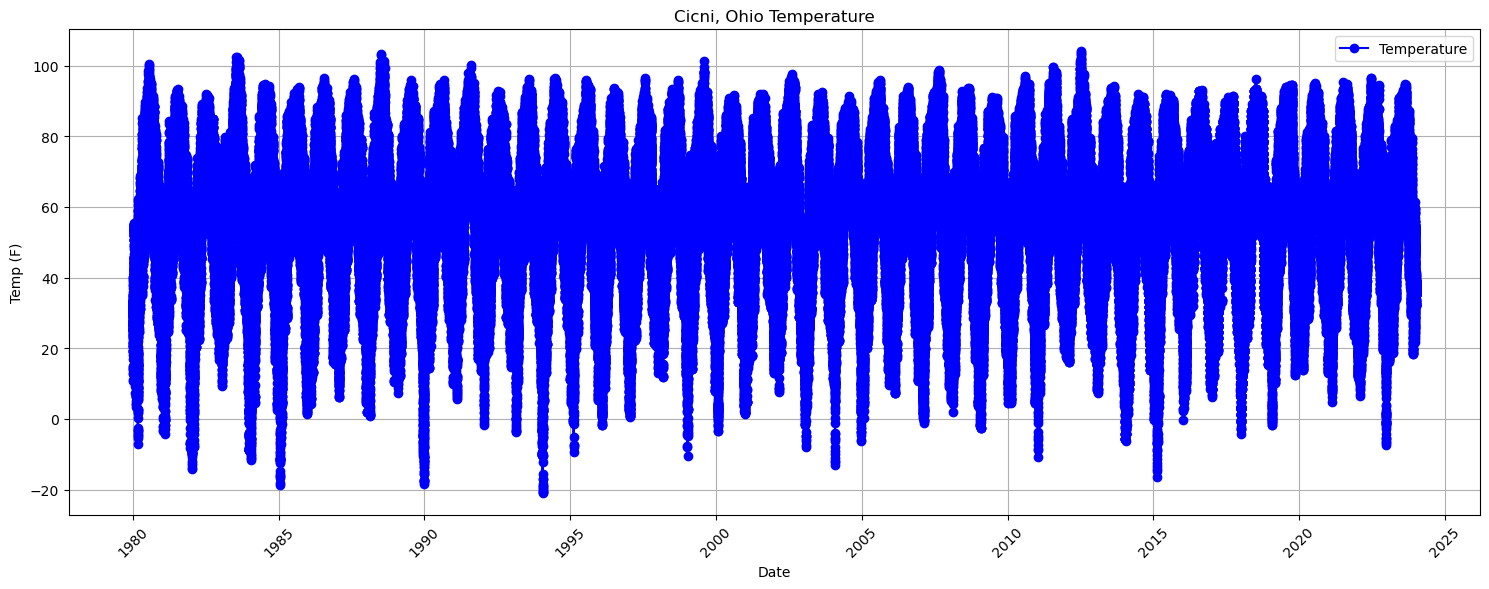

In [67]:
plt.figure(figsize=(15, 6))
plt.plot(df_cinci['temp'], marker='o', linestyle='-', color='b', label='Temperature')
plt.title('Cicni, Ohio Temperature')
plt.xlabel('Date')
plt.ylabel('Temp (F)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [68]:
# function to convert unix timestamp to EST
def convert_to_est(timestamp):
    # Convert timestamp to datetime in UTC
    dt_utc = datetime.utcfromtimestamp(timestamp)
    
    # Specify the UTC timezone
    utc_timezone = pytz.timezone('UTC')
    
    # Localize the UTC datetime
    dt_utc = utc_timezone.localize(dt_utc)
    
    # Convert UTC datetime to Eastern Standard Time (EST)
    eastern_timezone = pytz.timezone('America/New_York')
    dt_est = dt_utc.astimezone(eastern_timezone)
    
    return dt_est

#create a column for EST
df_columbus['dt_est'] = df_columbus['dt'].apply(convert_to_est)



In [69]:
#set the index to EST
df_columbus.set_index('dt_est',inplace=True)

In [70]:
df_columbus.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
dt_est,,,,,,,,,,,,,,,,,,,,,
1979-12-31 19:00:00-05:00,315532800,1980-01-01 00:00:00 +0000 UTC,-18000,Columbus,39.961176,-82.998794,29.70,2400.0,26.94,23.65,...,NaN,NaN,NaN,NaN,NaN,100,741,Fog,fog,50n
1979-12-31 20:00:00-05:00,315536400,1980-01-01 01:00:00 +0000 UTC,-18000,Columbus,39.961176,-82.998794,29.57,NaN,26.82,24.13,...,NaN,NaN,NaN,NaN,NaN,78,803,Clouds,broken clouds,04n
1979-12-31 21:00:00-05:00,315540000,1980-01-01 02:00:00 +0000 UTC,-18000,Columbus,39.961176,-82.998794,29.89,NaN,27.63,24.84,...,NaN,NaN,NaN,NaN,NaN,44,802,Clouds,scattered clouds,03n
1979-12-31 22:00:00-05:00,315543600,1980-01-01 03:00:00 +0000 UTC,-18000,Columbus,39.961176,-82.998794,29.12,3200.0,27.32,22.96,...,NaN,NaN,NaN,NaN,NaN,100,741,Fog,fog,50n
1979-12-31 23:00:00-05:00,315547200,1980-01-01 04:00:00 +0000 UTC,-18000,Columbus,39.961176,-82.998794,29.84,NaN,27.81,25.50,...,NaN,NaN,NaN,NaN,NaN,68,803,Clouds,broken clouds,04n


In [71]:
df_columbus.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 416153 entries, 1979-12-31 19:00:00-05:00 to 2024-01-01 18:00:00-05:00
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt                   416153 non-null  int64  
 1   dt_iso               416153 non-null  object 
 2   timezone             416153 non-null  int64  
 3   city_name            416153 non-null  object 
 4   lat                  416153 non-null  float64
 5   lon                  416153 non-null  float64
 6   temp                 416153 non-null  float64
 7   visibility           322179 non-null  float64
 8   dew_point            416153 non-null  float64
 9   feels_like           416153 non-null  float64
 10  temp_min             416153 non-null  float64
 11  temp_max             416153 non-null  float64
 12  pressure             416153 non-null  int64  
 13  sea_level            0 non-null       float64
 14  grnd_level           0

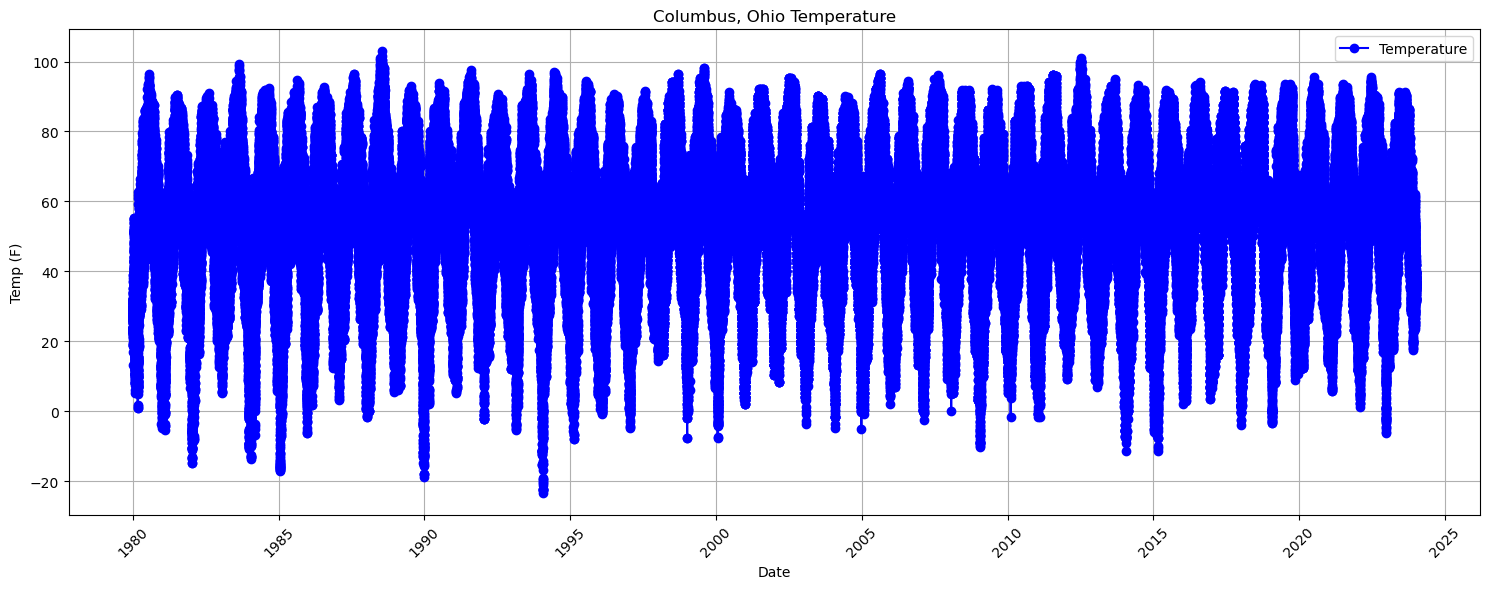

In [72]:
plt.figure(figsize=(15, 6))
plt.plot(df_columbus['temp'], marker='o', linestyle='-', color='b', label='Temperature')
plt.title('Columbus, Ohio Temperature')
plt.xlabel('Date')
plt.ylabel('Temp (F)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [73]:
# Read csv file as DataFrame, with the first column as row index
df_cle = pd.read_csv("data/cleveland.csv")
df_cle.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,315532800,1980-01-01 00:00:00 +0000 UTC,-18000,Cleveland,41.49932,-81.694361,32.32,10000.0,29.50,24.57,...,NaN,NaN,NaN,NaN,NaN,100,701,Mist,mist,50n
1,315532800,1980-01-01 00:00:00 +0000 UTC,-18000,Cleveland,41.49932,-81.694361,32.32,10000.0,29.50,24.57,...,NaN,NaN,NaN,NaN,NaN,100,741,Fog,fog,50n
2,315536400,1980-01-01 01:00:00 +0000 UTC,-18000,Cleveland,41.49932,-81.694361,31.84,NaN,29.55,27.91,...,NaN,NaN,NaN,NaN,NaN,66,803,Clouds,broken clouds,04n
3,315540000,1980-01-01 02:00:00 +0000 UTC,-18000,Cleveland,41.49932,-81.694361,31.98,NaN,29.93,31.98,...,NaN,NaN,NaN,NaN,NaN,88,804,Clouds,overcast clouds,04n
4,315543600,1980-01-01 03:00:00 +0000 UTC,-18000,Cleveland,41.49932,-81.694361,32.16,6400.0,29.37,25.74,...,NaN,NaN,NaN,NaN,NaN,100,741,Fog,fog,50n


In [74]:
# function to convert unix timestamp to EST
def convert_to_est(timestamp):
    # Convert timestamp to datetime in UTC
    dt_utc = datetime.utcfromtimestamp(timestamp)
    
    # Specify the UTC timezone
    utc_timezone = pytz.timezone('UTC')
    
    # Localize the UTC datetime
    dt_utc = utc_timezone.localize(dt_utc)
    
    # Convert UTC datetime to Eastern Standard Time (EST)
    eastern_timezone = pytz.timezone('America/New_York')
    dt_est = dt_utc.astimezone(eastern_timezone)
    
    return dt_est

#create a column for EST
df_cle['dt_est'] = df_cle['dt'].apply(convert_to_est)
df_cle.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,dt_est
0,315532800,1980-01-01 00:00:00 +0000 UTC,-18000,Cleveland,41.49932,-81.694361,32.32,10000.0,29.50,24.57,...,NaN,NaN,NaN,NaN,100,701,Mist,mist,50n,1979-12-31 19:00:00-05:00
1,315532800,1980-01-01 00:00:00 +0000 UTC,-18000,Cleveland,41.49932,-81.694361,32.32,10000.0,29.50,24.57,...,NaN,NaN,NaN,NaN,100,741,Fog,fog,50n,1979-12-31 19:00:00-05:00
2,315536400,1980-01-01 01:00:00 +0000 UTC,-18000,Cleveland,41.49932,-81.694361,31.84,NaN,29.55,27.91,...,NaN,NaN,NaN,NaN,66,803,Clouds,broken clouds,04n,1979-12-31 20:00:00-05:00
3,315540000,1980-01-01 02:00:00 +0000 UTC,-18000,Cleveland,41.49932,-81.694361,31.98,NaN,29.93,31.98,...,NaN,NaN,NaN,NaN,88,804,Clouds,overcast clouds,04n,1979-12-31 21:00:00-05:00
4,315543600,1980-01-01 03:00:00 +0000 UTC,-18000,Cleveland,41.49932,-81.694361,32.16,6400.0,29.37,25.74,...,NaN,NaN,NaN,NaN,100,741,Fog,fog,50n,1979-12-31 22:00:00-05:00


In [75]:
#set the index to EST
df_cle.set_index('dt_est',inplace=True)
df_cle.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
dt_est,,,,,,,,,,,,,,,,,,,,,
1979-12-31 19:00:00-05:00,315532800,1980-01-01 00:00:00 +0000 UTC,-18000,Cleveland,41.49932,-81.694361,32.32,10000.0,29.50,24.57,...,NaN,NaN,NaN,NaN,NaN,100,701,Mist,mist,50n
1979-12-31 19:00:00-05:00,315532800,1980-01-01 00:00:00 +0000 UTC,-18000,Cleveland,41.49932,-81.694361,32.32,10000.0,29.50,24.57,...,NaN,NaN,NaN,NaN,NaN,100,741,Fog,fog,50n
1979-12-31 20:00:00-05:00,315536400,1980-01-01 01:00:00 +0000 UTC,-18000,Cleveland,41.49932,-81.694361,31.84,NaN,29.55,27.91,...,NaN,NaN,NaN,NaN,NaN,66,803,Clouds,broken clouds,04n
1979-12-31 21:00:00-05:00,315540000,1980-01-01 02:00:00 +0000 UTC,-18000,Cleveland,41.49932,-81.694361,31.98,NaN,29.93,31.98,...,NaN,NaN,NaN,NaN,NaN,88,804,Clouds,overcast clouds,04n
1979-12-31 22:00:00-05:00,315543600,1980-01-01 03:00:00 +0000 UTC,-18000,Cleveland,41.49932,-81.694361,32.16,6400.0,29.37,25.74,...,NaN,NaN,NaN,NaN,NaN,100,741,Fog,fog,50n


In [83]:
df_cle.index

DatetimeIndex(['1979-12-31 19:00:00-05:00', '1979-12-31 19:00:00-05:00',
               '1979-12-31 20:00:00-05:00', '1979-12-31 21:00:00-05:00',
               '1979-12-31 22:00:00-05:00', '1979-12-31 23:00:00-05:00',
               '1980-01-01 00:00:00-05:00', '1980-01-01 01:00:00-05:00',
               '1980-01-01 01:00:00-05:00', '1980-01-01 02:00:00-05:00',
               ...
               '2024-01-01 09:00:00-05:00', '2024-01-01 10:00:00-05:00',
               '2024-01-01 11:00:00-05:00', '2024-01-01 12:00:00-05:00',
               '2024-01-01 13:00:00-05:00', '2024-01-01 14:00:00-05:00',
               '2024-01-01 15:00:00-05:00', '2024-01-01 16:00:00-05:00',
               '2024-01-01 17:00:00-05:00', '2024-01-01 18:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='dt_est', length=414785, freq=None)

In [77]:
df_cle.index.month

Index([12, 12, 12, 12, 12, 12,  1,  1,  1,  1,
       ...
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype='int32', name='dt_est', length=414785)

In [78]:
df_cle.index.year


Index([1979, 1979, 1979, 1979, 1979, 1979, 1980, 1980, 1980, 1980,
       ...
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
      dtype='int32', name='dt_est', length=414785)

In [79]:
years = df_cle.index.year.unique().drop(1979).drop(2024)
temp_list = []
for y in years :
    year_temp = df_cle[(df_cle.index.year==y)]["temp"].to_numpy()
    temp_list.append(year_temp)


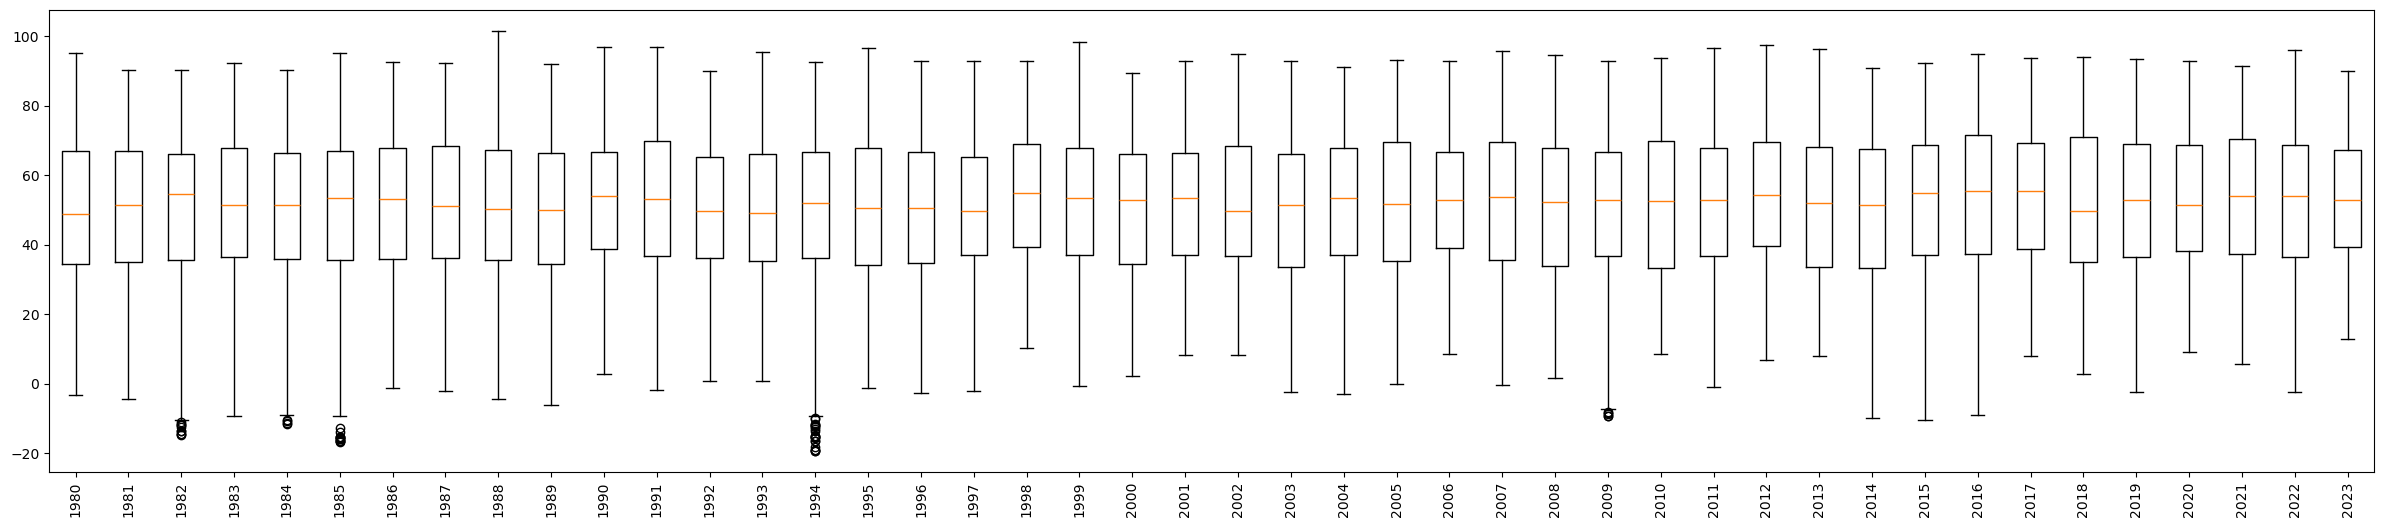

In [80]:
plt.figure(figsize=(30,6))
plt.boxplot(temp_list,labels=years);
plt.xticks(rotation=90);

In [82]:
ohio_df = pd.concat([df_columbus,df_cle,df_cinci],axis="rows", join="inner")
ohio_df.index

DatetimeIndex(['1979-12-31 19:00:00-05:00', '1979-12-31 20:00:00-05:00',
               '1979-12-31 21:00:00-05:00', '1979-12-31 22:00:00-05:00',
               '1979-12-31 23:00:00-05:00', '1980-01-01 00:00:00-05:00',
               '1980-01-01 01:00:00-05:00', '1980-01-01 01:00:00-05:00',
               '1980-01-01 02:00:00-05:00', '1980-01-01 03:00:00-05:00',
               ...
               '2024-01-01 10:00:00-05:00', '2024-01-01 11:00:00-05:00',
               '2024-01-01 12:00:00-05:00', '2024-01-01 13:00:00-05:00',
               '2024-01-01 14:00:00-05:00', '2024-01-01 15:00:00-05:00',
               '2024-01-01 16:00:00-05:00', '2024-01-01 17:00:00-05:00',
               '2024-01-01 17:00:00-05:00', '2024-01-01 18:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='dt_est', length=1250589, freq=None)

In [86]:
ohio_df= ohio_df.sort_index()


<Axes: title={'center': 'Ohio temperature from 1980-1990'}, xlabel='year', ylabel='temp'>

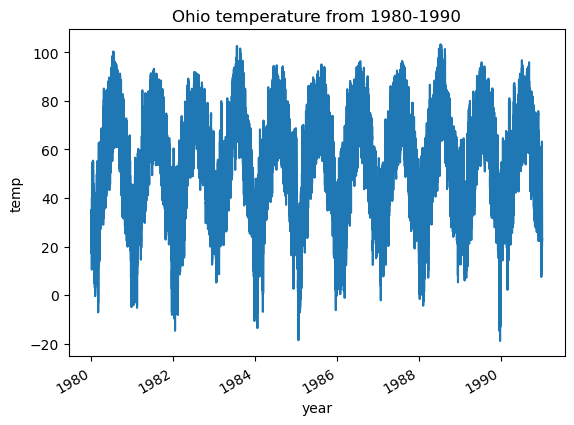

In [91]:
df_temp = ohio_df["temp"]
ohio_1980_1990 = df_temp.loc["1979-12-31 19:00:00-05:00":"1990-12-31 19:00:00-05:00"]
ohio_1980_1990.plot(xlabel="year",ylabel="temp",title="Ohio temperature from 1980-1990")


<Axes: title={'center': 'Ohio temperature from 1990-2000'}, xlabel='year', ylabel='temp'>

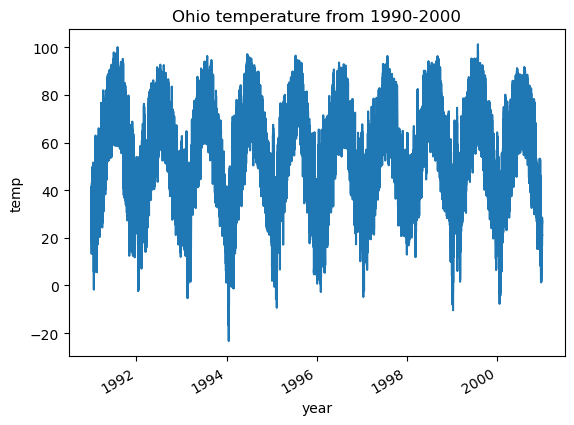

In [92]:
df_temp = ohio_df["temp"]
ohio_1990_2000 = df_temp.loc["1990-12-31 19:00:00-05:00":"2000-12-31 19:00:00-05:00"]
ohio_1990_2000.plot(xlabel="year",ylabel="temp",title="Ohio temperature from 1990-2000")

<Axes: title={'center': 'Ohio temperature from 2000-2010'}, xlabel='year', ylabel='temp'>

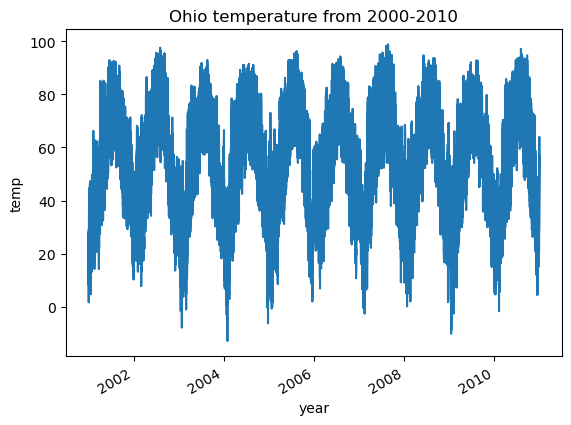

In [94]:
df_temp = ohio_df["temp"]
ohio_2000_2010 = df_temp.loc["2000-12-31 19:00:00-05:00":"2010-12-31 19:00:00-05:00"]
ohio_2000_2010.plot(xlabel="year",ylabel="temp",title="Ohio temperature from 2000-2010")

<Axes: title={'center': 'Ohio temperature from 2010-2020'}, xlabel='year', ylabel='temp'>

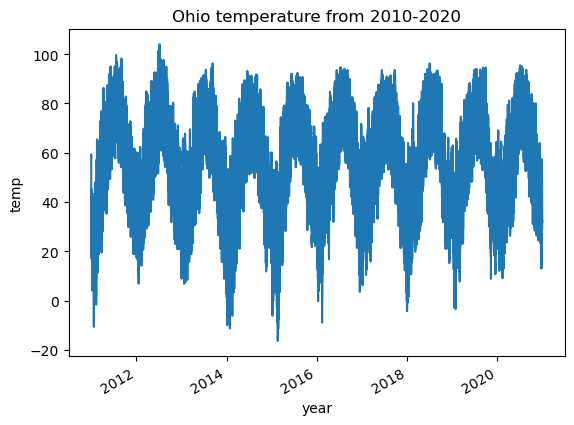

In [96]:
df_temp = ohio_df["temp"]
ohio_2010_2020 = df_temp.loc["2010-12-31 19:00:00-05:00":"2020-12-31 19:00:00-05:00"]
ohio_2010_2020.plot(xlabel="year",ylabel="temp",title="Ohio temperature from 2010-2020")

In [50]:
ohio_df.index.year

Index([1979, 1979, 1979, 1979, 1979, 1980, 1980, 1980, 1980, 1980,
       ...
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
      dtype='int32', name='dt_est', length=1250589)

In [51]:
year = ohio_df.index.year.unique()
temp_list = []
for y in year :
    year_temp = ohio_df[(ohio_df.index.year==y)]["temp"].to_numpy()
    temp_list.append(year_temp)

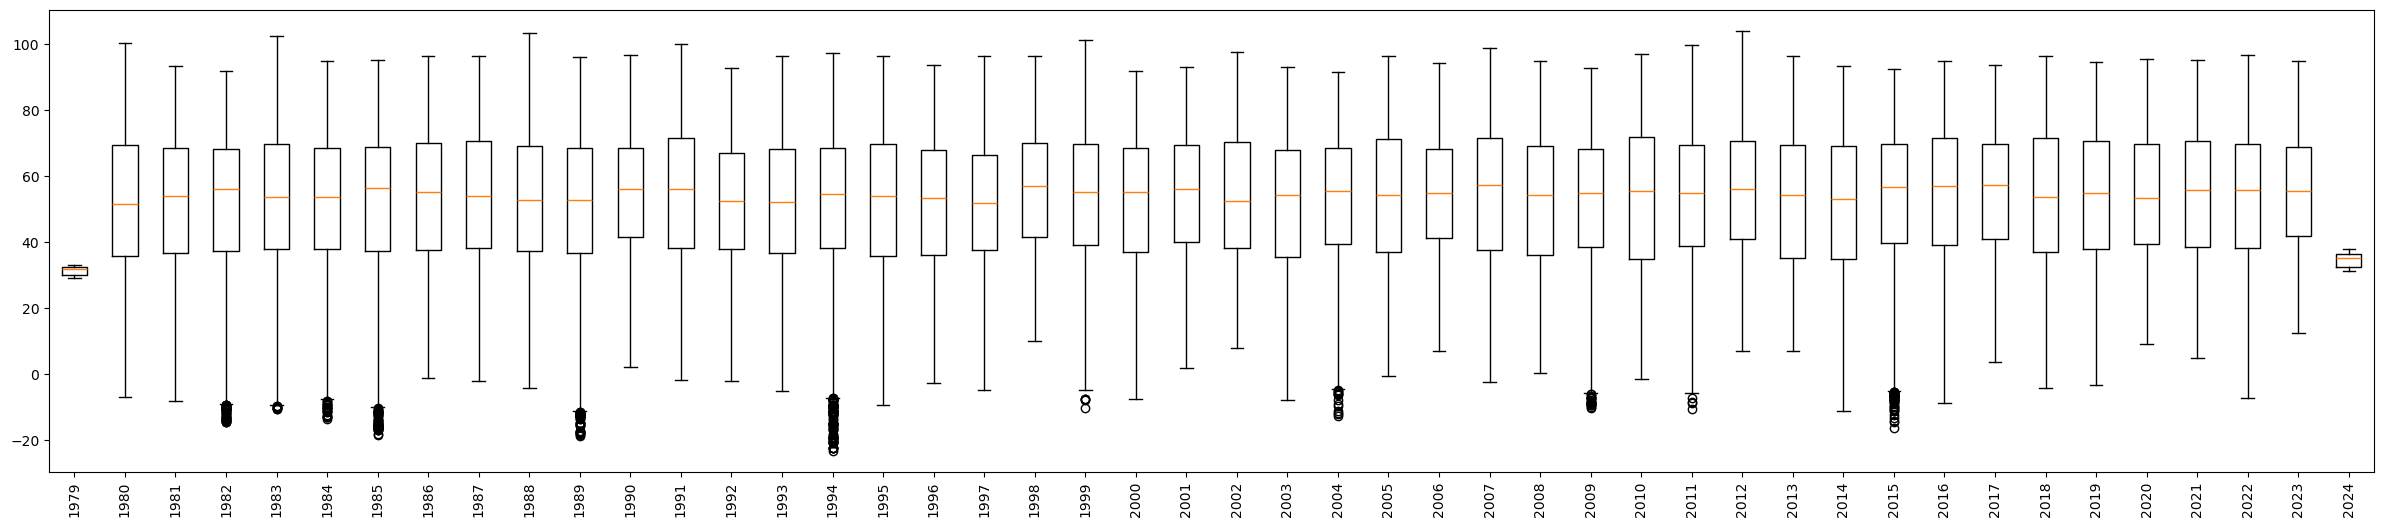

In [52]:
plt.figure(figsize=(30,6))
plt.boxplot(temp_list,labels=year);
plt.xticks(rotation=90);


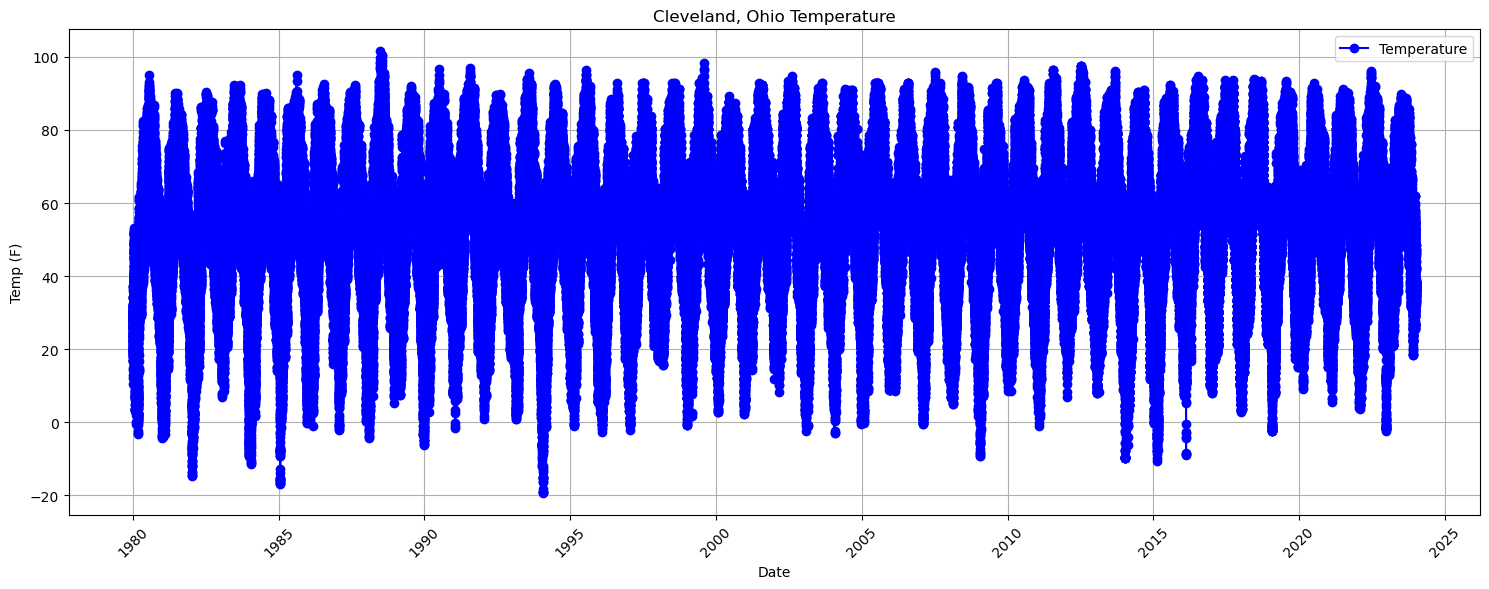

In [27]:
plt.figure(figsize=(15, 6))
plt.plot(df_cle['temp'], marker='o', linestyle='-', color='b', label='Temperature')
plt.title('Cleveland, Ohio Temperature')
plt.xlabel('Date')
plt.ylabel('Temp (F)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
# Read csv file as DataFrame, with the first column as row index
df_influenza = pd.read_csv("data/ohio_influenza.csv"
                )
# Preview the dataset
df_influenza.tail()

,year,week,Week Start,Week End,cuyahoga_cum,franklin_cum,hamilton_cum,cuyahoga_per_month,franklin_per_month,hamilton_per_month
185,2021,16,4/18/2021,4/24/2021,6.0,19.0,10.0,0,0,0
186,2021,17,4/25/2021,5/1/2021,6.0,19.0,10.0,0,0,0
187,2021,18,5/2/2021,5/8/2021,6.0,19.0,10.0,0,0,0
188,2021,19,5/9/2021,5/15/2021,6.0,19.0,10.0,0,0,0
189,2021,20,5/16/2021,5/22/2021,6.0,19.0,10.0,0,0,0


In [12]:
df_influenza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                190 non-null    int64  
 1   week                190 non-null    int64  
 2   Week Start          190 non-null    object 
 3   Week End            190 non-null    object 
 4   cuyahoga_cum        133 non-null    float64
 5   franklin_cum        133 non-null    float64
 6   hamilton_cum        133 non-null    float64
 7   cuyahoga_per_month  190 non-null    int64  
 8   franklin_per_month  190 non-null    int64  
 9   hamilton_per_month  190 non-null    int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 15.0+ KB


In [13]:
#df_influenza['Week Start'] = df_influenza['Week Start'].dt.strftime('%Y-%m-%d')
df_influenza['Week Start'] = pd.to_datetime(df_influenza['Week Start'])
#df_influenza.set_index('Week Start',inplace=True)
df_influenza.head()

,year,week,Week Start,Week End,cuyahoga_cum,franklin_cum,hamilton_cum,cuyahoga_per_month,franklin_per_month,hamilton_per_month
0,2017,40,2017-10-01,10/7/2017,0.0,0.0,1.0,0,0,1
1,2017,41,2017-10-08,10/14/2017,0.0,1.0,1.0,0,1,0
2,2017,42,2017-10-15,10/21/2017,1.0,3.0,1.0,1,2,0
3,2017,43,2017-10-22,10/28/2017,2.0,3.0,4.0,1,0,3
4,2017,44,2017-10-29,11/4/2017,5.0,3.0,8.0,3,0,4


In [14]:
# df_columbus['year'] = df_columbus.index.year
# df_columbus['week'] = df_columbus.index.isocalendar().week
# #weekly_avg_temp = df_columbus.groupby(['year', 'week'])['temp'].mean()
# # weekly_avg_temp

# weekly_avg_temp = df_columbus.groupby(['year', 'week'])['temp'].mean().reset_index()

# # Create a function to calculate the start date of the week
# def get_week_start(year, week):
#     # The ISO year starts on the Monday of the first week with at least 4 days in the new year
#     # This translates to the first Monday of the first week that includes January 4th
#     return pd.to_datetime(f'{year}-W{int(week)-1}-1', format='%G-W%V-%u')

# # Add the start date to the DataFrame
# weekly_avg_temp['Week Start'] = weekly_avg_temp.apply(lambda row: get_week_start(int(row['year']), int(row['week'])), axis=1)


# # Display the result
# print(weekly_avg_temp)

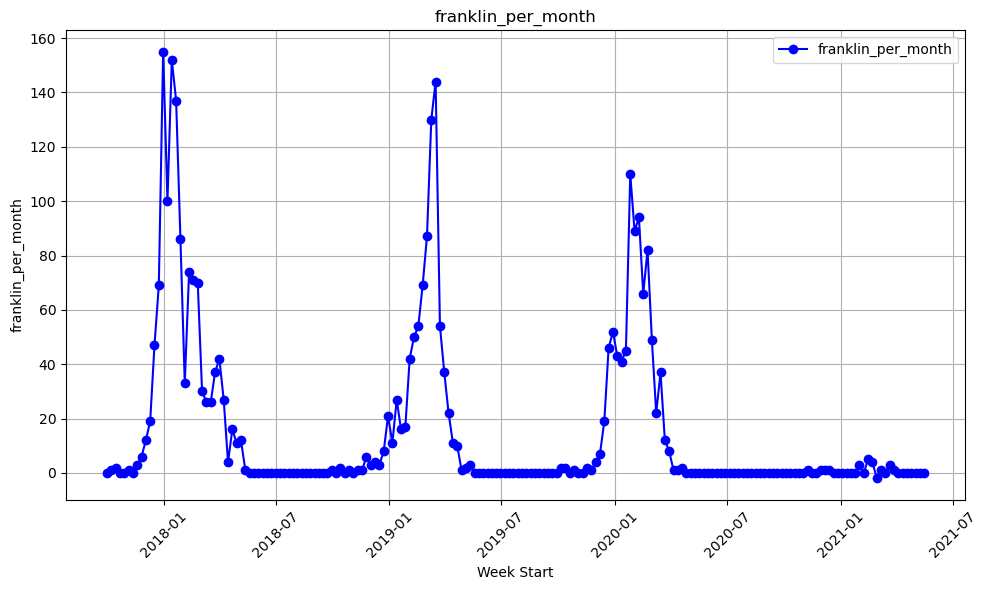

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(df_influenza['Week Start'], df_influenza['franklin_per_month'], marker='o', linestyle='-', color='b', label='franklin_per_month')
plt.xlabel('Week Start')
plt.ylabel('franklin_per_month')
plt.title('franklin_per_month')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:

# Resample by week, calculate the mean temperature
weekly_avg_temp = df_columbus['temp'].resample('W').mean()


# Reset index
weekly_avg_temp = weekly_avg_temp.reset_index()

# Rename the columns
weekly_avg_temp.columns = ['Week Start', 'Average Temp']

print(weekly_avg_temp)

                    Week Start  Average Temp
0    1980-01-06 00:00:00-05:00     28.482595
1    1980-01-13 00:00:00-05:00     30.496923
2    1980-01-20 00:00:00-05:00     38.612034
3    1980-01-27 00:00:00-05:00     27.912800
4    1980-02-03 00:00:00-05:00     16.601607
...                        ...           ...
2292 2023-12-10 00:00:00-05:00     42.378729
2293 2023-12-17 00:00:00-05:00     37.649716
2294 2023-12-24 00:00:00-05:00     39.001398
2295 2023-12-31 00:00:00-05:00     43.769175
2296 2024-01-07 00:00:00-05:00     33.660476

[2297 rows x 2 columns]


In [17]:
weekly_avg_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Week Start    2297 non-null   datetime64[ns, America/New_York]
 1   Average Temp  2297 non-null   float64                         
dtypes: datetime64[ns, America/New_York](1), float64(1)
memory usage: 36.0 KB


In [18]:
weekly_avg_temp['Week Start'] = weekly_avg_temp['Week Start'].dt.tz_localize(None)

In [19]:
#weekly_avg_temp = pd.DataFrame(weekly_avg_temp)

In [20]:
weekly_avg_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Week Start    2297 non-null   datetime64[ns]
 1   Average Temp  2297 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 36.0 KB


In [21]:
df_influenza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   year                190 non-null    int64         
 1   week                190 non-null    int64         
 2   Week Start          190 non-null    datetime64[ns]
 3   Week End            190 non-null    object        
 4   cuyahoga_cum        133 non-null    float64       
 5   franklin_cum        133 non-null    float64       
 6   hamilton_cum        133 non-null    float64       
 7   cuyahoga_per_month  190 non-null    int64         
 8   franklin_per_month  190 non-null    int64         
 9   hamilton_per_month  190 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(1)
memory usage: 15.0+ KB


In [22]:
weekly_avg_temp.tail()

,Week Start,Average Temp
2292,2023-12-10,42.378729
2293,2023-12-17,37.649716
2294,2023-12-24,39.001398
2295,2023-12-31,43.769175
2296,2024-01-07,33.660476


In [23]:
df_influenza.tail()

,year,week,Week Start,Week End,cuyahoga_cum,franklin_cum,hamilton_cum,cuyahoga_per_month,franklin_per_month,hamilton_per_month
185,2021,16,2021-04-18,4/24/2021,6.0,19.0,10.0,0,0,0
186,2021,17,2021-04-25,5/1/2021,6.0,19.0,10.0,0,0,0
187,2021,18,2021-05-02,5/8/2021,6.0,19.0,10.0,0,0,0
188,2021,19,2021-05-09,5/15/2021,6.0,19.0,10.0,0,0,0
189,2021,20,2021-05-16,5/22/2021,6.0,19.0,10.0,0,0,0


In [24]:
merged_df = pd.merge(weekly_avg_temp, df_influenza, on='Week Start', how='inner')
#merged_df = pd.concat([df_influenza,weekly_avg_temp], axis=1, join='inner')

In [25]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Week Start          190 non-null    datetime64[ns]
 1   Average Temp        190 non-null    float64       
 2   year                190 non-null    int64         
 3   week                190 non-null    int64         
 4   Week End            190 non-null    object        
 5   cuyahoga_cum        133 non-null    float64       
 6   franklin_cum        133 non-null    float64       
 7   hamilton_cum        133 non-null    float64       
 8   cuyahoga_per_month  190 non-null    int64         
 9   franklin_per_month  190 non-null    int64         
 10  hamilton_per_month  190 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(5), object(1)
memory usage: 16.5+ KB


In [26]:
merged_df.head(10)

,Week Start,Average Temp,year,week,Week End,cuyahoga_cum,franklin_cum,hamilton_cum,cuyahoga_per_month,franklin_per_month,hamilton_per_month
0,2017-10-01,67.473929,2017,40,10/7/2017,0.0,0.0,1.0,0,0,1
1,2017-10-08,68.004358,2017,41,10/14/2017,0.0,1.0,1.0,0,1,0
2,2017-10-15,66.508407,2017,42,10/21/2017,1.0,3.0,1.0,1,2,0
3,2017-10-22,57.868690,2017,43,10/28/2017,2.0,3.0,4.0,1,0,3
4,2017-10-29,48.365587,2017,44,11/4/2017,5.0,3.0,8.0,3,0,4
5,2017-11-05,50.559529,2017,45,11/11/2017,8.0,4.0,8.0,3,1,0
6,2017-11-12,40.345198,2017,46,11/18/2017,12.0,4.0,8.0,4,0,0
7,2017-11-19,42.325414,2017,47,11/25/2017,14.0,7.0,8.0,2,3,0
8,2017-11-26,39.200000,2017,48,12/2/2017,28.0,13.0,13.0,14,6,5
9,2017-12-03,43.511775,2017,49,12/9/2017,39.0,25.0,15.0,11,12,2


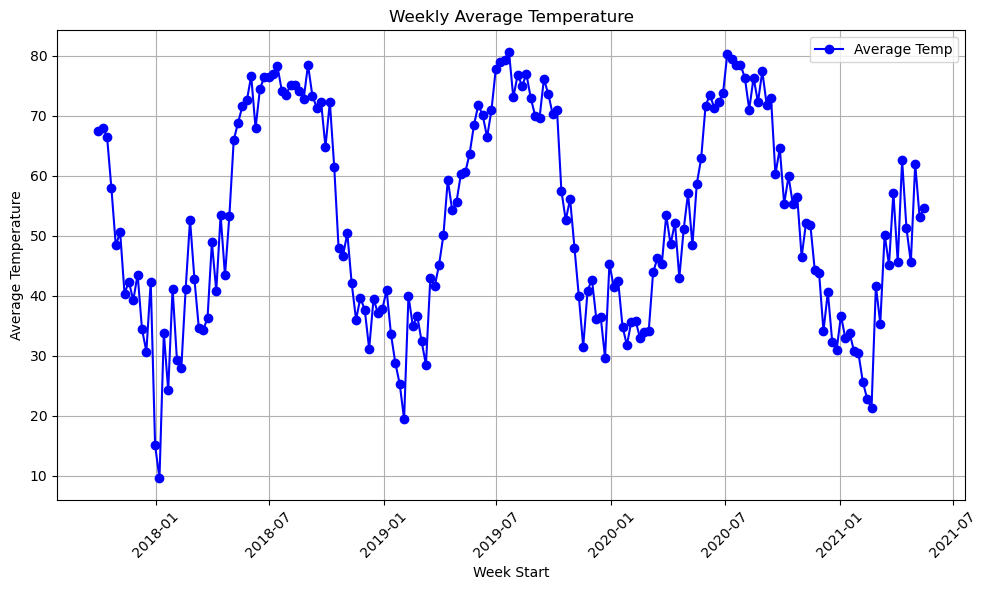

In [27]:
# Plot Week Start by Average Temp
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Week Start'], merged_df['Average Temp'], marker='o', linestyle='-', color='b', label='Average Temp')
plt.xlabel('Week Start')
plt.ylabel('Average Temperature')
plt.title('Weekly Average Temperature')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

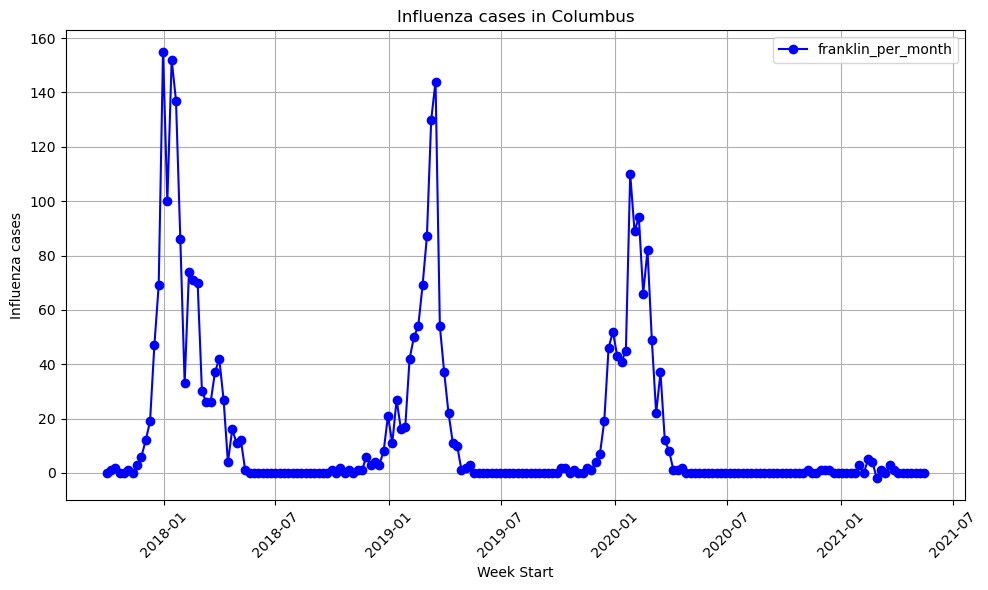

In [28]:
# Plot Week Start by franklin_per_month
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Week Start'], merged_df['franklin_per_month'], marker='o', linestyle='-', color='b', label='franklin_per_month')
plt.xlabel('Week Start')
plt.ylabel('Influenza cases')
plt.title('Influenza cases in Columbus')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
merged_df_filtered = merged_df[merged_df['Weekly Start'] < '2020-07-01']

KeyError: 'Weekly Start'

In [120]:
merged_df['Average Temp'].corr(merged_df['franklin_per_month'])

-0.4981438281089464